reference : https://github.com/Amritpal-001/Stock-price-predicition/blob/master/3%20-Closing_Price_Prediction_Keras.ipynb

In [44]:
!pip install mplfinance

In [45]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
from datetime import datetime, timedelta
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import plotly.graph_objs as go
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas_datareader as web

In [46]:
start_date = "2018-01-01"
end_date = "2024-04-01"

df = yf.Ticker("BBRI.JK")
df = df.history(start=start_date, end=end_date)
del df["Dividends"]
del df["Stock Splits"]
forecastData = df.copy()
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-22 00:00:00+07:00,6050.0,6125.0,6050.0,6125.0,46529200
2024-03-25 00:00:00+07:00,6250.0,6250.0,6125.0,6250.0,115729600
2024-03-26 00:00:00+07:00,6300.0,6300.0,6200.0,6300.0,120748400
2024-03-27 00:00:00+07:00,6300.0,6325.0,6225.0,6250.0,73308900
2024-03-28 00:00:00+07:00,6100.0,6200.0,6025.0,6050.0,288926900


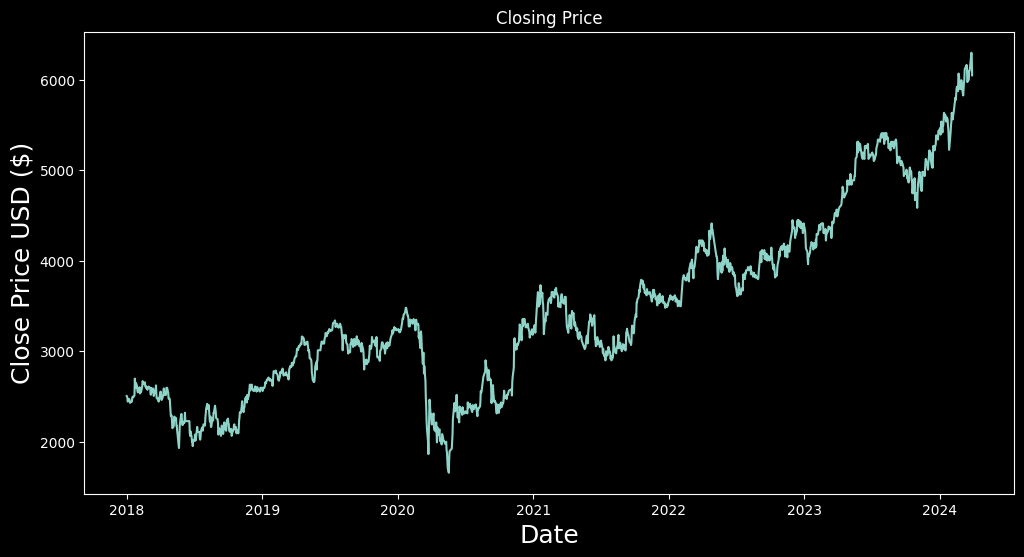

In [47]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [48]:
data=df.filter(['Close'])

#Convert to np array
dataset=data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1241

In [49]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.1826719 ],
       [0.18119136],
       [0.17823032],
       ...,
       [1.        ],
       [0.98923624],
       [0.94618122]])

In [50]:
train_data = scaled_data[0:training_data_len,:]

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.1826719 , 0.18119136, 0.17823032, 0.16934728, 0.17526935,
       0.17526935, 0.17230831, 0.16638625, 0.16786674, 0.16786674,
       0.16934728, 0.17823032, 0.18119136, 0.17971087, 0.17971087,
       0.18415239, 0.22412613, 0.21080151, 0.20191858, 0.21376249,
       0.20635999, 0.19451592, 0.19155489, 0.19155489, 0.19747695,
       0.20339896, 0.18859391, 0.19155489, 0.19451592, 0.19303532,
       0.20635999, 0.21820407, 0.21524303, 0.21228206, 0.21228206,
       0.21524303, 0.20635999, 0.20635999, 0.20191858, 0.20487945,
       0.19747695, 0.20191858, 0.20339896, 0.20487945, 0.20487945,
       0.20191858, 0.19599646, 0.18563288, 0.20191858, 0.1900744 ,
       0.20043798, 0.20043798, 0.19895749, 0.1826719 , 0.18859391,
       0.1900744 , 0.19747695, 0.20784048, 0.18711331, 0.17674983])]
[0.17674983498946528]



In [51]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [52]:
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1181, 60, 1)

In [53]:
#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#Add second layer to model
model.add(LSTM(50, return_sequences=False))
#Add Dense Layer to model with 25 neurons
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))

In [54]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [55]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=10)

Epoch 1/10
1181/1181 [==============================] - 61s 49ms/step - loss: 0.0017
Epoch 2/10
1181/1181 [==============================] - 35s 30ms/step - loss: 6.3990e-04
Epoch 3/10
1181/1181 [==============================] - 36s 30ms/step - loss: 5.3244e-04
Epoch 4/10
1181/1181 [==============================] - 38s 32ms/step - loss: 4.2274e-04
Epoch 5/10
1181/1181 [==============================] - 36s 30ms/step - loss: 3.7091e-04
Epoch 6/10
1181/1181 [==============================] - 36s 30ms/step - loss: 3.1703e-04
Epoch 7/10
1181/1181 [==============================] - 36s 30ms/step - loss: 3.4539e-04
Epoch 8/10
1181/1181 [==============================] - 35s 30ms/step - loss: 2.9878e-04
Epoch 9/10
1181/1181 [==============================] - 36s 30ms/step - loss: 3.0144e-04
Epoch 10/10
1181/1181 [==============================] - 36s 31ms/step - loss: 3.1989e-04


In [56]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-60: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [57]:
#Convert the data to a numpy array
x_test=np.array(x_test)

In [58]:
#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [59]:
#Get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

10/10 [==============================] - 1s 16ms/step


In [60]:
#Get root mean squared error(RMSE)
rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse

60.102879284274195

<ipython-input-61-eed24a5ed2ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


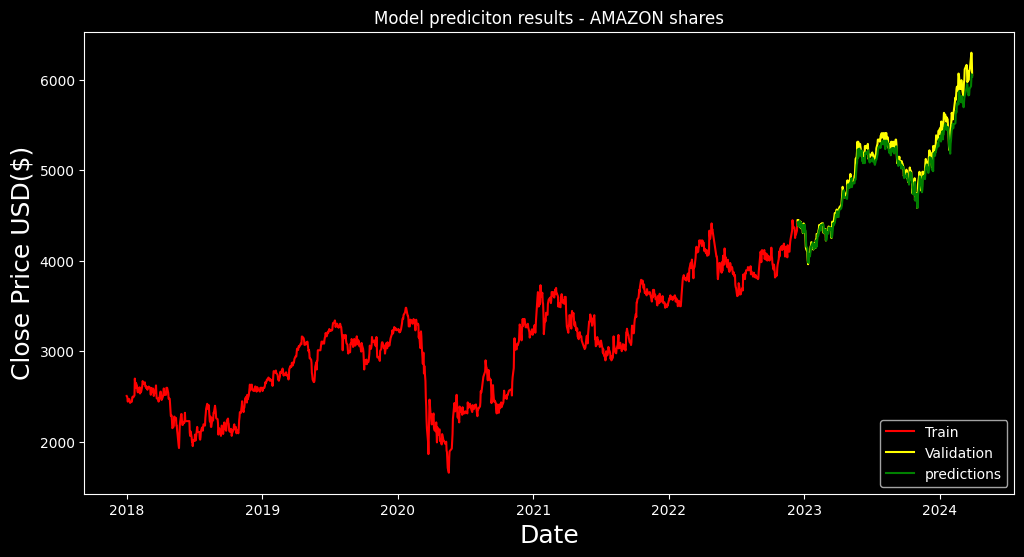

In [61]:
plt.style.use('dark_background')

#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(12,6))
plt.title('Model prediciton results - AMAZON shares')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'] , color='red')
plt.plot(valid['Close'] , color='yellow')
plt.plot(valid[ 'predictions'] , color='green')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
# plt.savefig('/content/prediction.png')
plt.show()

In [62]:
#Show the valid and predicted prices
valid.tail(15)

,Close,predictions
Date,,
2024-03-06 00:00:00+07:00,5972.343750,5747.430176
2024-03-07 00:00:00+07:00,5996.425781,5800.742188
2024-03-08 00:00:00+07:00,6116.835938,5822.841797
2024-03-13 00:00:00+07:00,6165.000000,5913.779785
2024-03-14 00:00:00+07:00,6150.000000,5954.551270
2024-03-15 00:00:00+07:00,5975.000000,5950.480957
2024-03-18 00:00:00+07:00,6000.000000,5827.882324
2024-03-19 00:00:00+07:00,6000.000000,5837.939941
2024-03-20 00:00:00+07:00,6100.000000,5833.261719


# Prediction The Tomorrow

In [63]:
start_date_predicted = "2018-01-01"
end_date_predicted = "2024-03-01"

df_predicted = yf.Ticker("BBRI.JK")
df_predicted = df_predicted.history(start=start_date, end=end_date)
del df_predicted["Dividends"]
del df_predicted["Stock Splits"]
forecastData = df_predicted.copy()
df_predicted.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-22 00:00:00+07:00,6050.0,6125.0,6050.0,6125.0,46529200
2024-03-25 00:00:00+07:00,6250.0,6250.0,6125.0,6250.0,115729600
2024-03-26 00:00:00+07:00,6300.0,6300.0,6200.0,6300.0,120748400
2024-03-27 00:00:00+07:00,6300.0,6325.0,6225.0,6250.0,73308900
2024-03-28 00:00:00+07:00,6100.0,6200.0,6025.0,6050.0,288926900


In [64]:
ticker = 'BBRI.JK'
new_df=df_predicted.filter(['Close'])

#Get last 60 days values and convert into array
last_60_days=new_df[-60:].values

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

#Create an empty list
X_test=[]
#Appemd the past 60days
X_test.append(last_60_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f'Price of {ticker} tomorrow:{pred_price}')

1/1 [==============================] - 0s 27ms/step
Price of BBRI.JK tomorrow:[[5893.9307]]


In [65]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

# Define the start and end dates for historical data retrieval
start_date_predicted = "2018-01-01"
end_date_predicted = "2024-03-01"

# Retrieve historical data for the specified period
df_predicted = yf.Ticker("BBRI.JK")
df_predicted = df_predicted.history(start=start_date_predicted, end=end_date_predicted)

# Remove unnecessary columns
del df_predicted["Dividends"]
del df_predicted["Stock Splits"]

# Copy the dataframe for future use
forecastData = df_predicted.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

# Fit and transform scaler on df_predicted['Close']
scaler.fit(df_predicted['Close'].values.reshape(-1,1))

# Get last 60 days values and convert into array
last_60_days = df_predicted['Close'][-60:].values

# Scale the data to be values between 0
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1,1))

# Create an empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test data into numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get predicted scaled price for 10 days in the future
days_to_predict = 10

# Create an empty list to store predictions
predictions = []

for i in range(days_to_predict):
    # Get predicted scaled price for the next day
    pred_price = model.predict(X_test)
    predictions.append(pred_price[0][0])

    # Update X_test with the predicted price for the next iteration
    X_test = np.roll(X_test, -1)
    X_test[-1][-1][-1] = pred_price

# Undo the scaling
predictions_unscaled = scaler.inverse_transform(np.array(predictions).reshape(-1,1))

# Print the predicted prices for the next 10 days
for i, pred_price in enumerate(predictions_unscaled):
    future_date = df_predicted.index[-1] + pd.Timedelta(days=i+1)
    print(f'Projected Close Price of {ticker} in {i+1} days ({future_date}): {pred_price[0]}')

1/1 [==============================] - 0s 26ms/step


<ipython-input-65-32addd57cec4>:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_test[-1][-1][-1] = pred_price


1/1 [==============================] - 0s 26ms/step
Projected Close Price of BBRI.JK in 1 days (2024-03-01 00:00:00+07:00): 5723.4072265625
Projected Close Price of BBRI.JK in 2 days (2024-03-02 00:00:00+07:00): 5595.47802734375
Projected Close Price of BBRI.JK in 3 days (2024-03-03 00:00:00+07:00): 5491.28759765625
Projected Close Price of BBRI.JK in 4 days (2024-03-04 00:00:00+07:00): 5401.263671875
Projected Close Price of BBRI.JK in 5 days (2024-03-05 00:00:00+07:00): 5322.1123046875
Projected Close Price of BBRI.JK in 6 days (2024-03-06 00:00:00+07:00): 5252.125
Projected Close Price of BBRI.JK in 7 days (2024-03-07 00:00:00+07:00): 5189.986328125
Projected Close Price of BBRI.JK in 8 days (2024-03-08 00:00:00+07:00): 5134.53271484375
Projected Close Price of BBRI.JK in 9 days (2024-03-09 00:00:00+07:00): 5084.724609375
Projected Close Price of BBRI.JK in 10 days (2024-03-10 00:00:00+07:00): 5039.65234375
